<a href="https://colab.research.google.com/github/pydamavand/documentation/blob/main/docs/notebooks/dataset_demos/MEUT_demo.ipynb"
     target="_blank" rel="noopener">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
  </a>

# **MEUT Dataset Demonstration**

# Cloning the **damavand** repository

In [ ]:
!git clone https://github.com/pydamavand/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successful

# Importings

In [1]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import MUET
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['MEUT'])
downloader.download_extract('MEUT.zip', 'MEUT/')

# Instantiating a digestor object

In [3]:
dataset = MUET('MEUT/fm6xzxnf36-2/', os.listdir('MEUT/fm6xzxnf36-2/'), [3])
mining_params = {
    'win_len': 10000,
    'hop_len': 5000
}
dataset.mine(mining_params)

# Aggregating data over the third channel

In [4]:
df = pd.concat(dataset.data[3]).reset_index(drop = True)
df

0       1       2       3       4       5       6       7       8  \
0    1.2666  1.0863  1.2619  1.0262  0.5688  0.8018  1.0815  0.5893  1.3947   
1    0.7622  0.7220  1.1902  0.9127  0.9632  1.2018  0.8078  1.0471  0.8268   
2    1.1204  0.8002  0.6241  0.7893  1.0753  0.8071  0.9605  0.8527  0.7562   
3    0.5021  0.9887  1.1369  0.9777  1.1457  1.2852  0.9475  1.0292  1.2071   
4    0.4603  1.1289  0.7353  1.1372  0.7812  1.1996  0.9217  0.4311  1.2474   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
948  1.1333  1.0647  1.0057  0.9308  0.9584  0.7640  0.7204  0.8193  0.8335   
949  1.1124  1.0830  0.9493  0.9067  0.9229  0.7486  0.7436  0.7156  0.7114   
950  0.9498  0.8349  0.8612  0.9097  0.9825  1.0573  1.1616  1.1726  1.1897   
951  0.8021  0.6988  0.7541  0.8113  0.8752  0.9022  1.1178  1.1399  1.1692   
952  0.7843  0.7991  0.7984  0.8943  0.9371  1.0001  1.1332  1.1315  1.2031   

          9  ...    9993    9994    9995    9996    9997    9998    9999  \
0    1.2990  ...  0.8280  0.9742  0.9013  1.2043  1.1234  1.1803  1.4774   
1    0.8127  ...  1.0598  0.9710  0.8199  1.4032  0.5488  1.3034  1.1842   
2    1.3141  ...  0.6383  1.1305  1.2806  1.0464  0.9988  0.8893  0.7472   
3    1.2955  ...  1.0351  1.1757  0.8629  0.8174  1.1683  0.9307  0.9282   
4    0.7464  ...  1.1843  1.1004  0.5805  1.1865  0.5676  0.9766  0.9430   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
948  0.9000  ...  1.1683  1.1828  1.1728  1.1462  1.1098  1.0133  0.9573   
949  0.7514  ...  1.1864  1.1791  1.1298  0.9603  0.9554  0.8857  0.8053   
950  1.1852  ...  1.1295  1.1739  1.1008  0.9265  0.8579  0.7646  0.7966   
951  1.1779  ...  1.1629  1.1838  1.1569  1.0788  0.9513  0.9549  0.8471   
952  1.1875  ...  0.9645  1.0088  1.0618  1.1734  1.1739  1.1378  1.0438   

       state  severity       load  
0      inner     1.7mm    300watt  
1      inner     1.7mm    300watt  
2      inner     1.7mm    300watt  
3      inner     1.7mm    300watt  
4      inner     1.7mm    300watt  
..       ...       ...        ...  
948  healthy         -  with with  
949  healthy         -  with with  
950  healthy         -  with with  
951  healthy         -  with with  
952  healthy         -  with with  

[953 rows x 10003 columns]

In [5]:
signals, metadata = df.iloc[:, : -3], df.iloc[:, -3 :]
signals

0       1       2       3       4       5       6       7       8     \
0    1.2666  1.0863  1.2619  1.0262  0.5688  0.8018  1.0815  0.5893  1.3947   
1    0.7622  0.7220  1.1902  0.9127  0.9632  1.2018  0.8078  1.0471  0.8268   
2    1.1204  0.8002  0.6241  0.7893  1.0753  0.8071  0.9605  0.8527  0.7562   
3    0.5021  0.9887  1.1369  0.9777  1.1457  1.2852  0.9475  1.0292  1.2071   
4    0.4603  1.1289  0.7353  1.1372  0.7812  1.1996  0.9217  0.4311  1.2474   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
948  1.1333  1.0647  1.0057  0.9308  0.9584  0.7640  0.7204  0.8193  0.8335   
949  1.1124  1.0830  0.9493  0.9067  0.9229  0.7486  0.7436  0.7156  0.7114   
950  0.9498  0.8349  0.8612  0.9097  0.9825  1.0573  1.1616  1.1726  1.1897   
951  0.8021  0.6988  0.7541  0.8113  0.8752  0.9022  1.1178  1.1399  1.1692   
952  0.7843  0.7991  0.7984  0.8943  0.9371  1.0001  1.1332  1.1315  1.2031   

       9     ...    9990    9991    9992    9993    9994    9995    9996  \
0    1.2990  ...  1.1624  1.1464  0.8923  0.8280  0.9742  0.9013  1.2043   
1    0.8127  ...  1.1883  0.7536  0.5153  1.0598  0.9710  0.8199  1.4032   
2    1.3141  ...  0.6905  0.7385  0.7172  0.6383  1.1305  1.2806  1.0464   
3    1.2955  ...  0.9602  1.1475  1.1205  1.0351  1.1757  0.8629  0.8174   
4    0.7464  ...  1.3979  0.8986  0.6804  1.1843  1.1004  0.5805  1.1865   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
948  0.9000  ...  0.9696  1.1463  1.1494  1.1683  1.1828  1.1728  1.1462   
949  0.7514  ...  1.1253  1.1974  1.1655  1.1864  1.1791  1.1298  0.9603   
950  1.1852  ...  1.1352  1.1830  1.1776  1.1295  1.1739  1.1008  0.9265   
951  1.1779  ...  1.0087  1.1645  1.1937  1.1629  1.1838  1.1569  1.0788   
952  1.1875  ...  0.9143  0.8392  0.8605  0.9645  1.0088  1.0618  1.1734   

       9997    9998    9999  
0    1.1234  1.1803  1.4774  
1    0.5488  1.3034  1.1842  
2    0.9988  0.8893  0.7472  
3    1.1683  0.9307  0.9282  
4    0.5676  0.9766  0.9430  
..      ...     ...     ...  
948  1.1098  1.0133  0.9573  
949  0.9554  0.8857  0.8053  
950  0.8579  0.7646  0.7966  
951  0.9513  0.9549  0.8471  
952  1.1739  1.1378  1.0438  

[953 rows x 10000 columns]

In [6]:
metadata

state severity       load
0      inner    1.7mm    300watt
1      inner    1.7mm    300watt
2      inner    1.7mm    300watt
3      inner    1.7mm    300watt
4      inner    1.7mm    300watt
..       ...      ...        ...
948  healthy        -  with with
949  healthy        -  with with
950  healthy        -  with with
951  healthy        -  with with
952  healthy        -  with with

[953 rows x 3 columns]

In [7]:
metadata['comb'] = metadata['state'] + '_' + metadata['severity'] + '_' + metadata['load']
metadata['comb'].value_counts()

comb
outer_1.1mm_200watt          29
inner_0.9mm_100watt          29
inner_1.1mm_300watt          28
inner_1.5mm_200watt          28
inner_0.7mm_100watt          27
outer_0.9mm_100watt          27
outer_0.9mm_200watt          27
inner_1.3mm_100watt          27
outer_1.1mm_300watt          26
outer_1.1mm_100watt          26
inner_1.1mm_200watt          26
inner_1.1mm_100watt          26
inner_1.7mm_200watt          26
inner_0.9mm_200watt          26
outer_1.3mm_200watt          26
inner_1.7mm_100watt          26
outer_1.7mm_100watt          26
outer_1.7mm_300watt          26
outer_1.5mm_300watt          26
inner_1.3mm_200watt          25
outer_1.3mm_100watt          25
inner_0.9mm_300watt          25
outer_0.7mm_100watt          25
inner_1.5mm_100watt          25
outer_1.5mm_100watt          25
outer_0.7mm_200watt          25
inner_1.5mm_300watt          25
outer_1.7mm_200watt          25
outer_1.5mm_200watt          24
inner_1.7mm_300watt          24
inner_1.3mm_300watt          24
outer_1.3mm_300watt          24
inner_0.7mm_200watt          24
outer_0.9mm_300watt          23
healthy_-_without without    22
healthy_-_with with          22
inner_0.7mm_300watt          21
outer_0.7mm_300watt          12
Name: count, dtype: int64

# Signal Processing

## Envelope Extraction

In [8]:
signals_env = env(signals)
signals_env.shape

(953, 10000)

# FFT

In [9]:
# Defenition of a window (to avoid leakage error) and a bandpass frequency filter (to both avoid aliasing and DC-component removal)
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 4500], 'bandpass', fs = 10000, output='sos')

In [10]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(953, 5000)

# ZoomedFFT

In [11]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 10000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(953, 2000)

# STFT

In [12]:
# Defenition of a window (to avoid leakage error) and a bandpass frequency filter (to both avoid aliasing and DC-component removal)
STFT_window = scipy.signal.windows.hann(1024) # the length of the window must match the `window_len` argument from the stft function
STFT_freq_filter = scipy.signal.butter(25, [5, 4500], 'bandpass', fs = 10000, output='sos')
signals_env_STFT = stft(signals_env, 1024, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(953, 45, 512)

# Statistical Features

In [13]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [14]:
# Extracting the desired feature-set from time-domain signals
features_df = feature_extractor(signals, features)
features_df

mean       var       rms
0    0.960899  0.058191  0.990716
1    0.962156  0.059195  0.992441
2    0.964804  0.061620  0.996227
3    0.965389  0.059221  0.995589
4    0.964893  0.054064  0.992514
..        ...       ...       ...
948  0.982739  0.027171  0.996467
949  0.982324  0.027039  0.995992
950  0.980701  0.027028  0.994386
951  0.981535  0.027043  0.995215
952  0.981407  0.026704  0.994919

[953 rows x 3 columns]

# Visualization

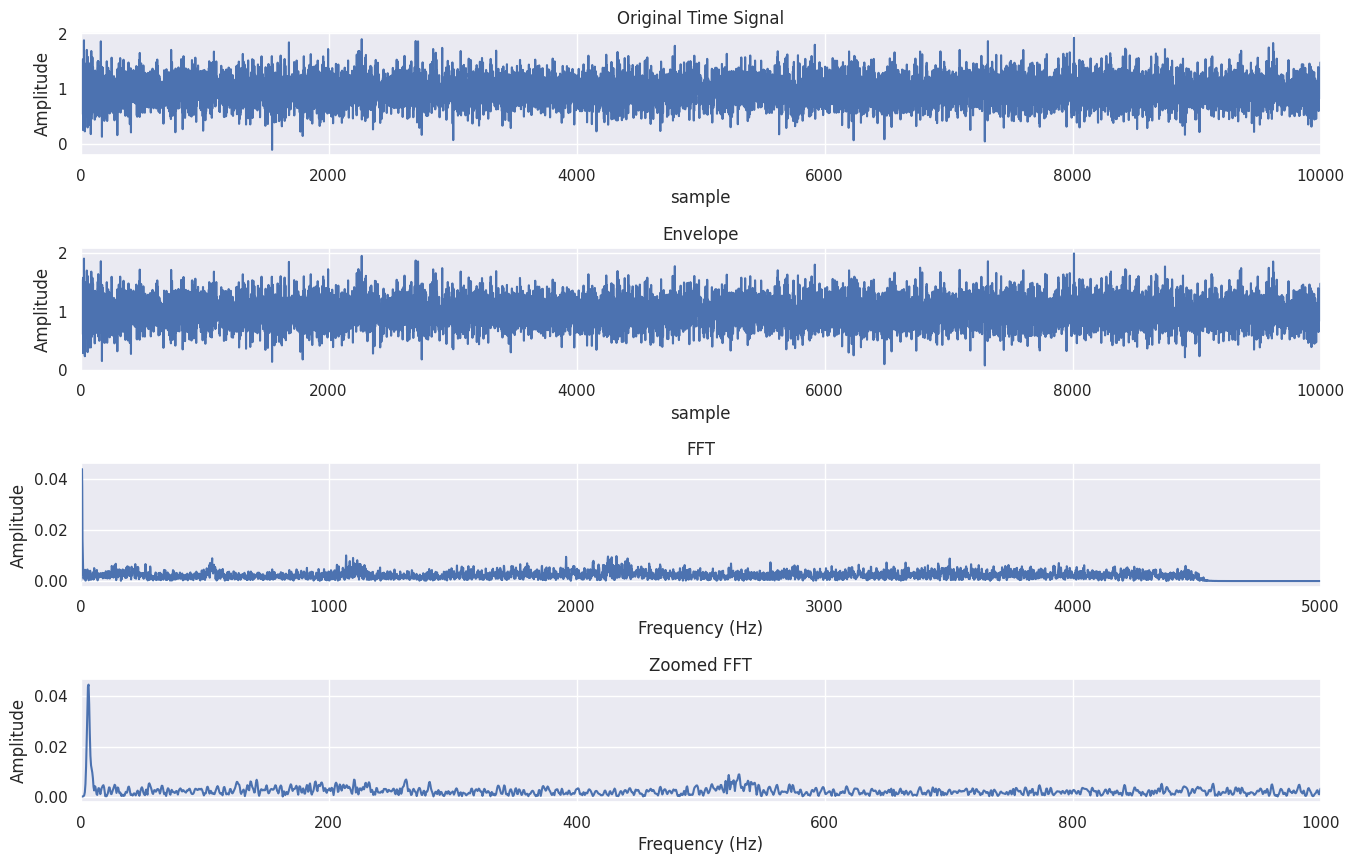

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 10000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 10000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(10000, 10000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 5000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

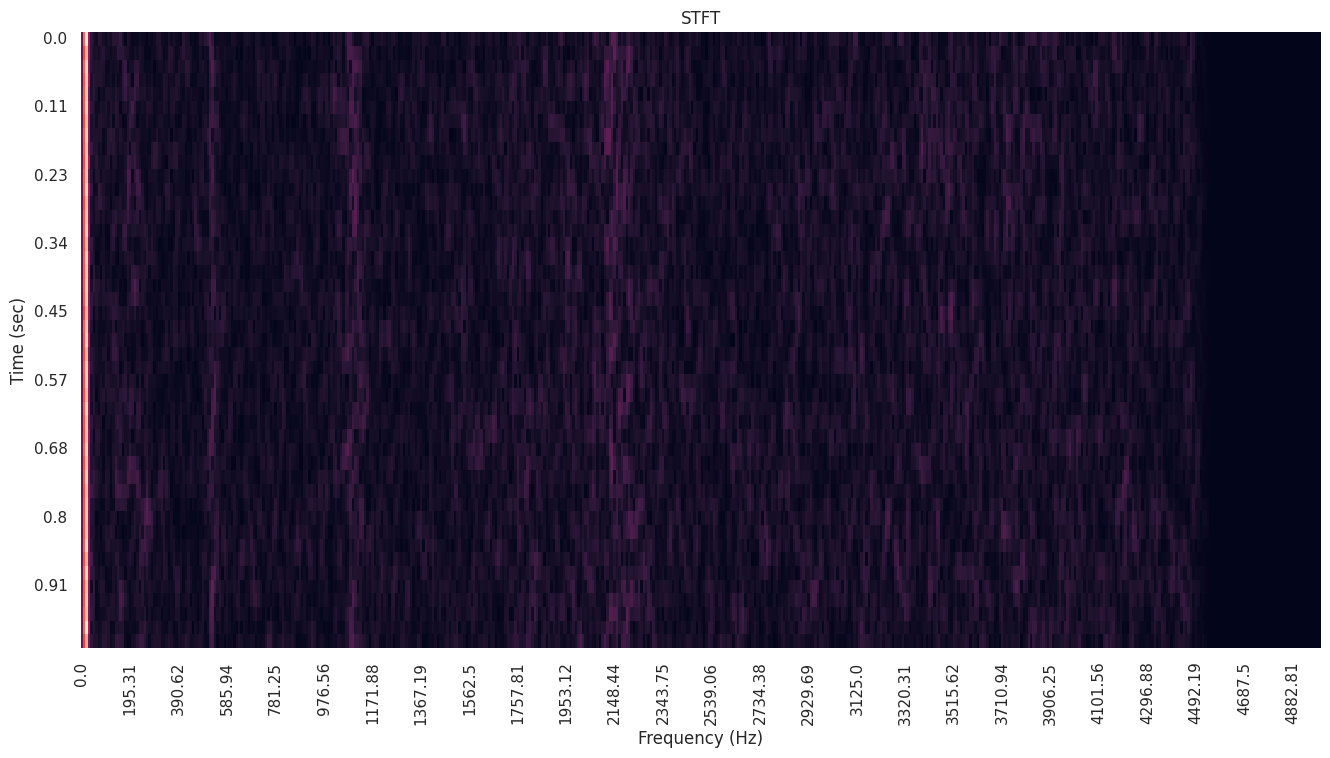

In [16]:
t = np.linspace(0, 1, 45)
f = fft_freq_axis(1024, 10000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])

fig.show()